In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Datasets\Final_dataset.csv')
data

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Malad Mumbai,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2526,Shagun White Woods,Sector 23 Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,1 to 5 Year,Ready To Move,Built Up Area,1180.0,10338,2,2,2,122.0
2527,Guru Anant,Sector 2 Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,0 to 1 Year,Ready To Move,Built Up Area,1090.0,8073,11,2,2,88.0
2528,Balaji Mayuresh Delta,Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,1 to 5 Year,Ready To Move,Built Up Area,1295.0,10579,6,2,2,137.0
2529,Balaji Mayuresh Delta,Ulwe Navi Mumbai Mumbai,Ulwe Navi-Mumbai,1 to 5 Year,Ready To Move,Built Up Area,1850.0,9243,6,3,3,171.0


## Feature Engineering
### Drop Unwanted Columns

In [3]:
data.head()

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Malad Mumbai,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0


In [4]:
data.drop(columns = ['Property_Name', 'Location','Availability','Bathroom'], inplace = True)
data.shape

(2531, 8)

### Label Encoding for Categorical Columns

In [5]:
le = LabelEncoder()

In [6]:
for column in data.describe(include = 'object').columns:
    data[column] = le.fit_transform(data[column])

In [7]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Region,2531.0,67.56,40.60,0.0,31.0,60.0,107.0,144.0
Property_Age,2531.0,1.30,1.09,0.0,0.0,1.0,2.0,4.0
Area_Tpye,2531.0,1.74,1.18,0.0,1.0,1.0,3.0,3.0
Area_SqFt,2531.0,948.77,486.83,185.0,634.5,850.0,1150.0,5000.0
Rate_SqFt,2531.0,16553.69,10204.27,1808.0,8751.0,13636.0,22314.0,55611.0
Floor_No,2531.0,8.78,7.98,-1.0,3.0,6.0,12.0,55.0
Bedroom,2531.0,1.95,0.83,1.0,1.0,2.0,2.0,6.0
Price_Lakh,2531.0,161.35,162.32,13.0,66.0,110.0,197.0,1900.0


In [8]:
data

,Region,Property_Age,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Price_Lakh
0,69,0,3,2900.0,17241,14,3,500.0
1,73,1,3,1900.0,12631,8,3,240.0
2,24,2,3,595.0,15966,3,1,95.0
3,18,3,0,1450.0,25862,1,3,375.0
4,107,3,1,876.0,39954,5,2,350.0
...,...,...,...,...,...,...,...,...
2526,130,1,0,1180.0,10338,2,2,122.0
2527,130,0,0,1090.0,8073,11,2,88.0
2528,130,1,0,1295.0,10579,6,2,137.0
2529,130,1,0,1850.0,9243,6,3,171.0


##  Correlation Heatmap

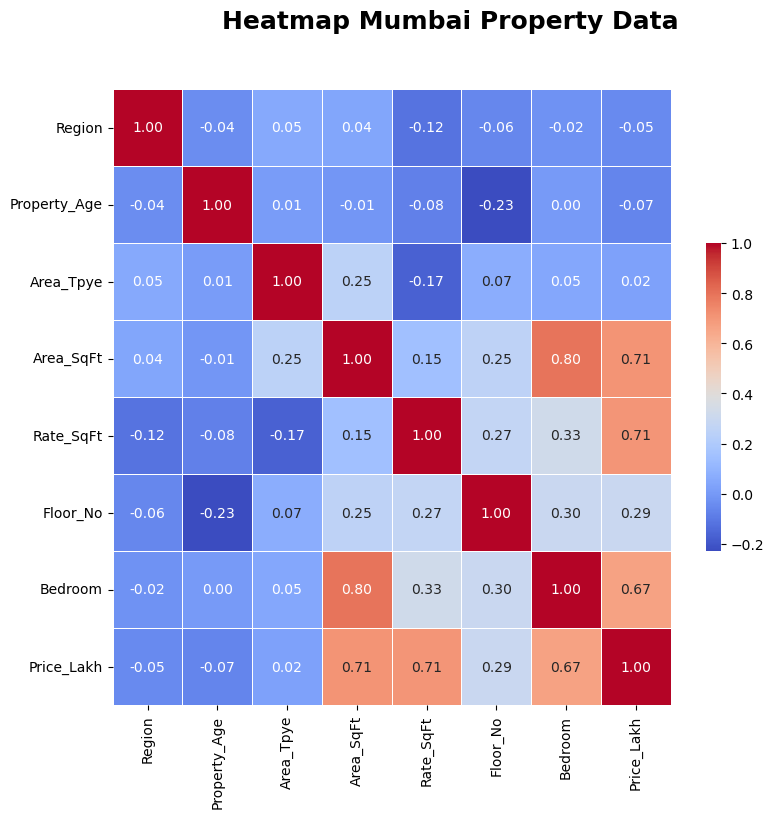

In [9]:
fig = plt.figure(figsize = (9, 8))
sns.heatmap(data.corr(), annot = True, linewidth = .5, cbar_kws = {'shrink': .5}, fmt = '.2f', cmap = 'coolwarm')
fig.suptitle('Heatmap Mumbai Property Data', fontsize = 18, fontweight = 'bold')
plt.show()

## Model Building

In [10]:
data.head()

,Region,Property_Age,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Price_Lakh
0,69,0,3,2900.0,17241,14,3,500.0
1,73,1,3,1900.0,12631,8,3,240.0
2,24,2,3,595.0,15966,3,1,95.0
3,18,3,0,1450.0,25862,1,3,375.0
4,107,3,1,876.0,39954,5,2,350.0


## Train Test Split

In [11]:
x = data.drop('Price_Lakh', axis = 1)
y = data['Price_Lakh']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 12)

print(x_train.shape, x_test.shape)

(2024, 7) (507, 7)


## Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(x_train, y_train)

print('Training Accuracy', linear.score(x_train, y_train))
print('Test Accuracy', linear.score(x_test, y_test))

Training Accuracy 0.8729615274576086
Test Accuracy 0.869652867069965


## Decision Tree Regressor

In [14]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(min_samples_split = 2)
dt.fit(x_train, y_train)

print('Training Accuracy', dt.score(x_train, y_train))
print('Test Accuracy', dt.score(x_test, y_test))

Training Accuracy 1.0
Test Accuracy 0.9645202626268514


## Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, max_depth = 5, random_state = 12)
rf.fit(x_train, y_train)

print('Training Accuracy', rf.score(x_train, y_train))
print('Test Accuracy', rf.score(x_test, y_test))

Training Accuracy 0.9753917006228885
Test Accuracy 0.9641944588626601


## Polynomial Features

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
poly.fit_transform(x)

poly_model = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                      ('rf', RandomForestRegressor(n_estimators = 1000, max_depth = 5, random_state = 12))])

poly_model.fit(x_train, y_train)

print('Training Accuracy', poly_model.score(x_train, y_train))
print('Test Accuracy', poly_model.score(x_test, y_test))

Training Accuracy 0.9903850350980973
Test Accuracy 0.9821027587862007


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly1 = PolynomialFeatures(degree = 2)
poly1.fit_transform(x)

poly_model1 = Pipeline([('poly', PolynomialFeatures(degree = 2)),
                      ('linear', LinearRegression(fit_intercept=False))])

poly_model1.fit(x_train, y_train)

print('Training Accuracy', poly_model1.score(x_train, y_train))
print('Test Accuracy', poly_model1.score(x_test, y_test))

Training Accuracy 0.9832978154650837
Test Accuracy 0.9873735094896775


## Obeservaion :
### We select the final model - Polynomial Feature.
### We got 98.69 % Model Accuracy.

## Final Model Evaluation

In [18]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy = model.score(test_features, test_labels)
    
    print('Average Error = {:0.4f} degrees'.format(np.mean(errors)))
    print('Model Accuracy = {:0.4f} %'.format(accuracy))

In [19]:
evaluate(poly_model1, x_train, y_train)

Average Error = 8.1346 degrees
Model Accuracy = 0.9833 %


In [20]:
evaluate(poly_model, x_test, y_test)

Average Error = 8.1629 degrees
Model Accuracy = 0.9821 %


## Visualizing Results

In [21]:
pred = poly_model.predict(x_test)

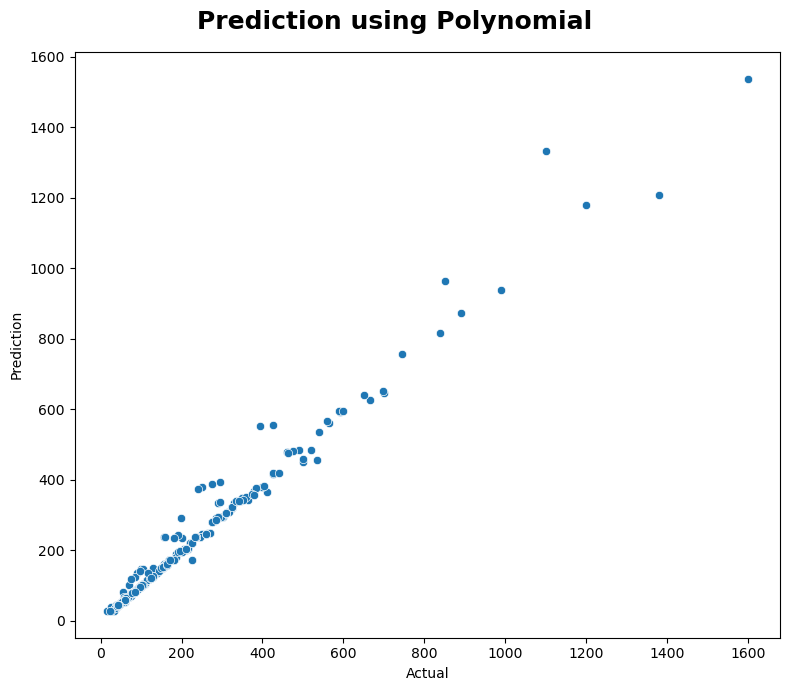

In [22]:
fig = plt.figure(figsize = (8, 7))
sns.scatterplot(y_test, pred)
fig.suptitle('Prediction using Polynomial', fontsize= 18 , fontweight='bold')
plt.xlabel("Actual")
plt.ylabel("Prediction")


fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

In [23]:
Train_Accuracy = [linear.score(x_train, y_train) * 100, dt.score(x_train, y_train) * 100, rf.score(x_train, y_train) * 100, poly_model.score(x_train, y_train) * 100, poly_model1.score(x_train, y_train) * 100]
Test_Accuracy = [linear.score(x_test, y_test) * 100, dt.score(x_test, y_test) * 100, rf.score(x_test, y_test) * 100, poly_model.score(x_test, y_test) * 100, poly_model1.score(x_test, y_test) * 100]

In [24]:
Test_Accuracy

[86.96528670699651,
 96.45202626268514,
 96.419445886266,
 98.21027587862007,
 98.73735094896774]

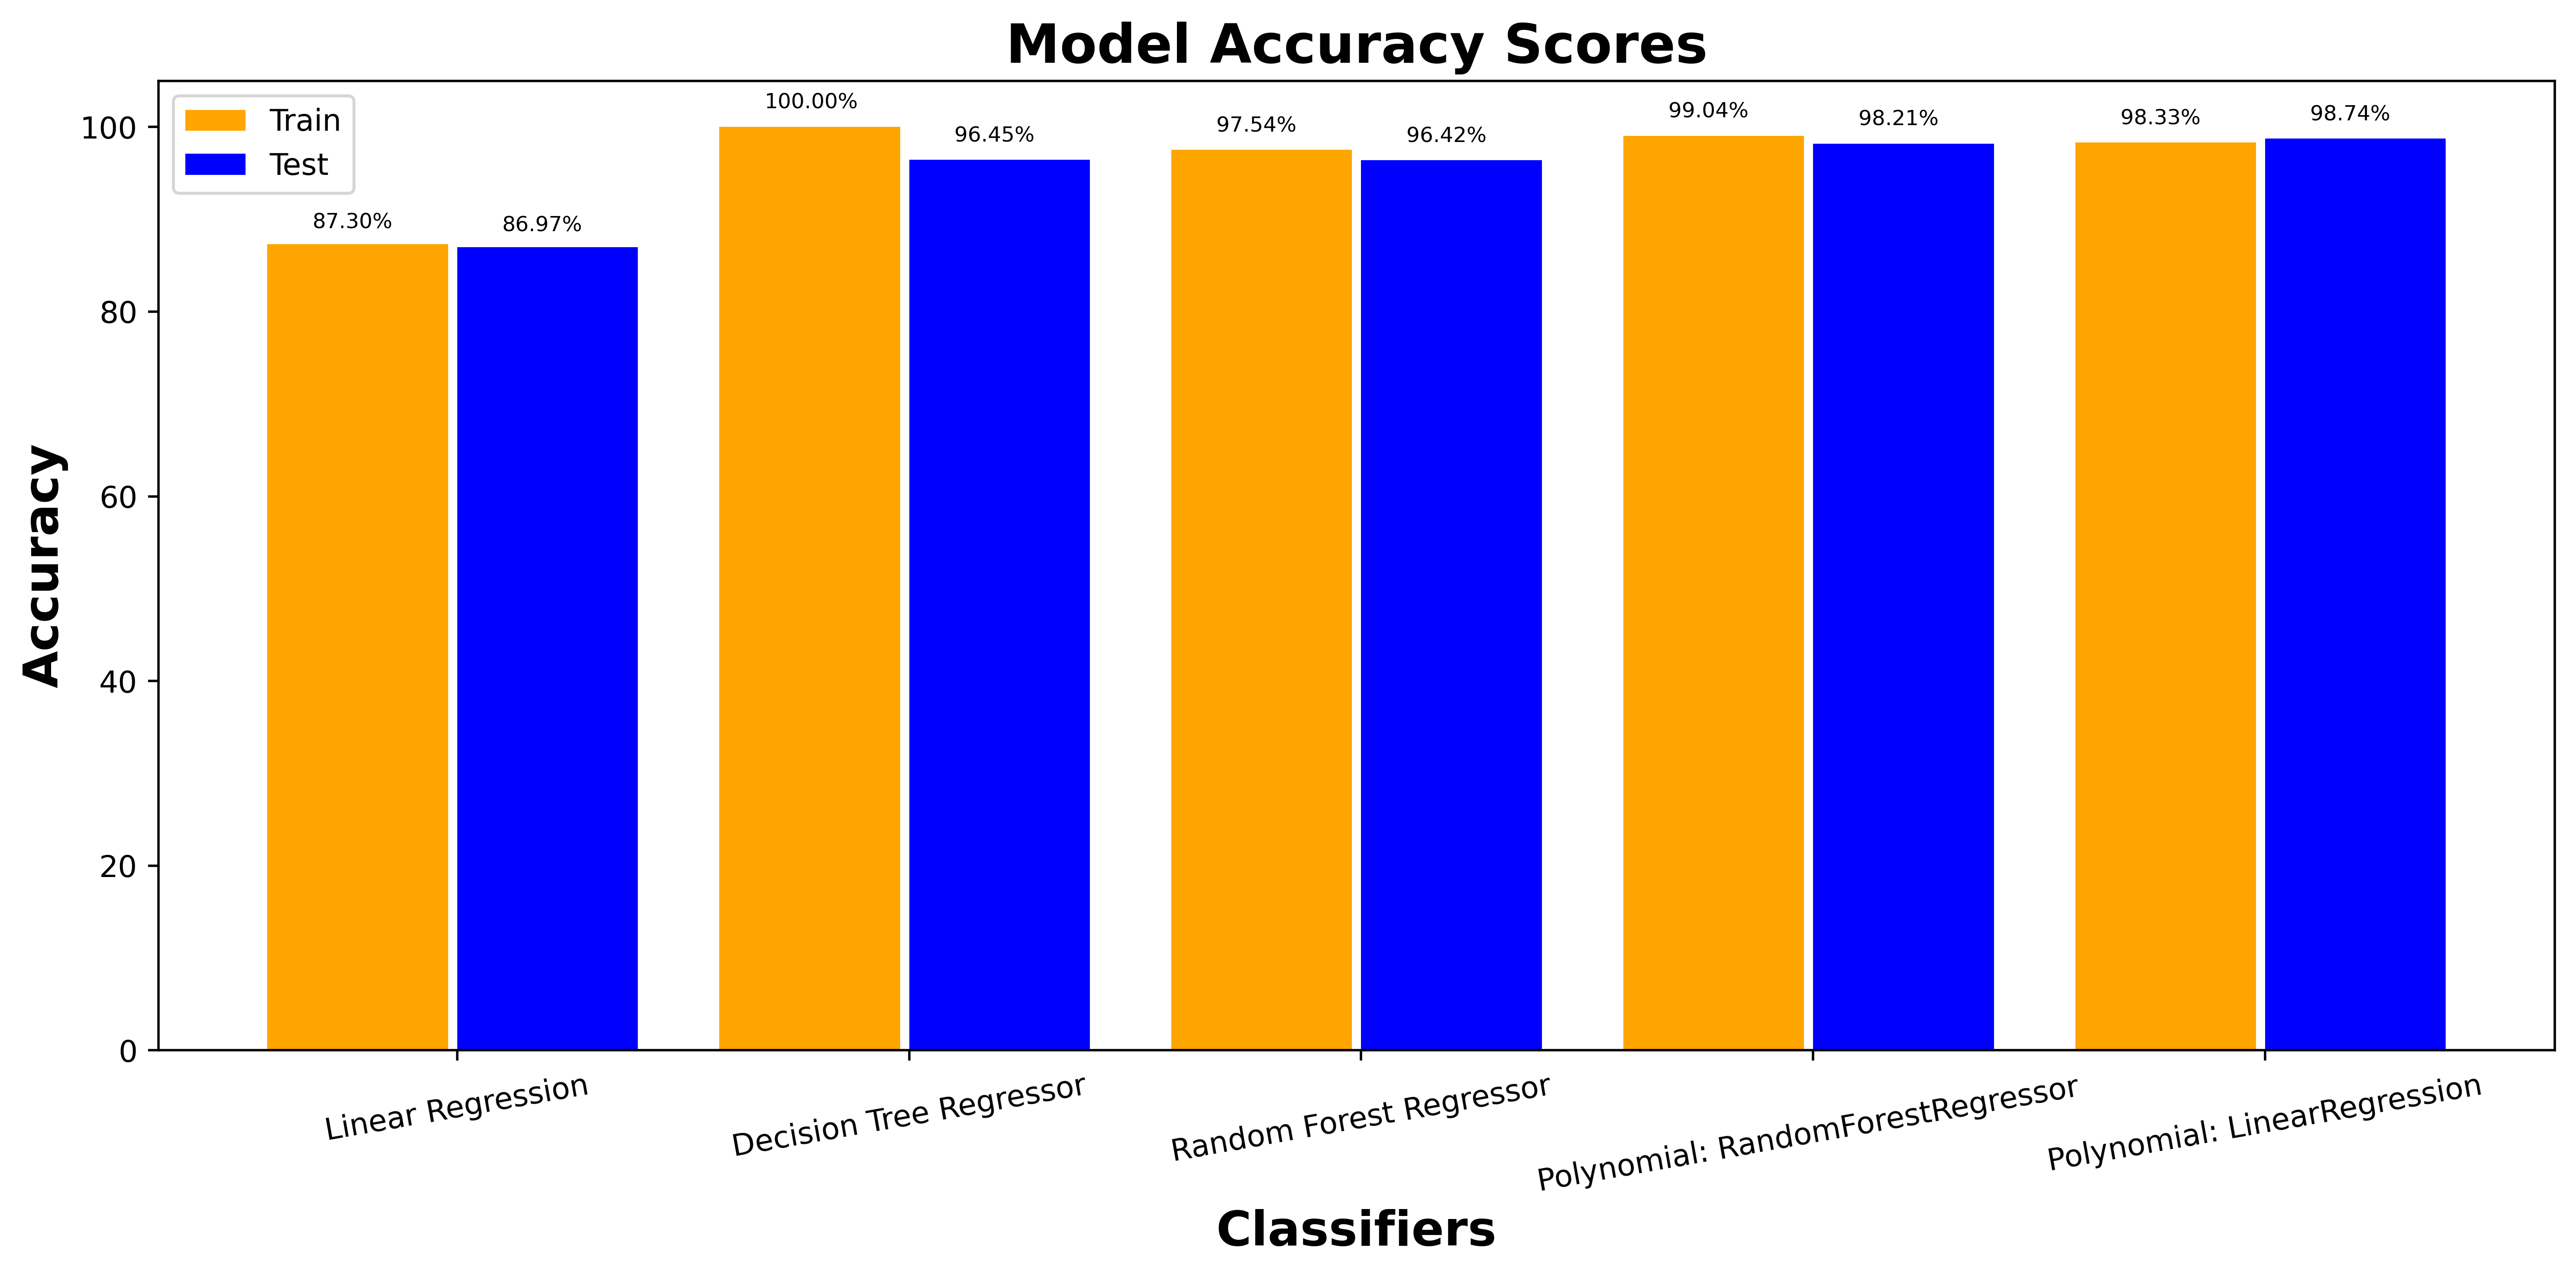

In [38]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(5)
model_names = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor", "Polynomial: RandomForestRegressor ", "Polynomial: LinearRegression"]

bar1 = plt.bar(x_pos - 0.22, Train_Accuracy, width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, Test_Accuracy, width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Train_Accuracy[i]), fontsize = 7)
    
for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02, 
             s = '{:.2f}%'.format(Test_Accuracy[i]), fontsize = 7)


fig.tight_layout()
plt.show()
fig.savefig('Image\Mod_Acc_Bar', dpi = 500)